# import packages.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the contents of the file.

In [2]:
train_data = pd.read_csv('~/input/titanic/train.csv')
test_data = pd.read_csv('~/input/titanic/test.csv')
all_data =pd.concat([train_data, test_data])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Analyze data.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Laleff, Mr. Kristo",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
test_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Swane, Mr. George",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##  Pclass

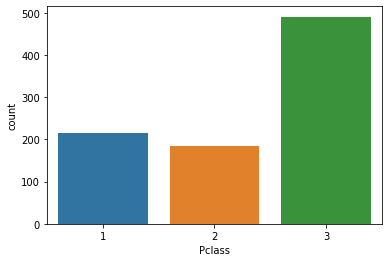

In [11]:
sns.countplot(train_data['Pclass'])

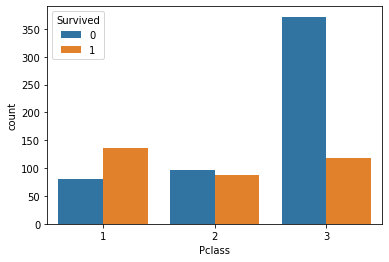

In [12]:
sns.countplot(x='Pclass', data=train_data, hue='Survived')

## Sex

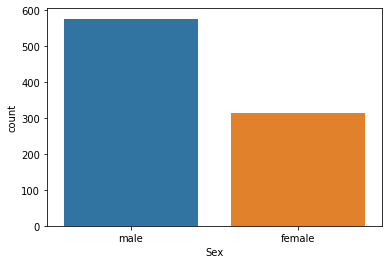

In [13]:
sns.countplot(train_data['Sex'])

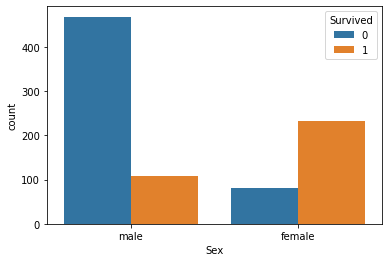

In [14]:
sns.countplot(x='Sex', data=train_data, hue='Survived')

## Age

In [15]:
age_filled_data = train_data.fillna({'Age': 99})

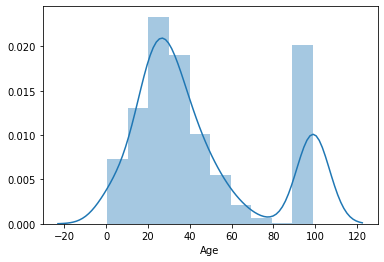

In [38]:
sns.distplot(age_filled_data['Age'], bins=10)

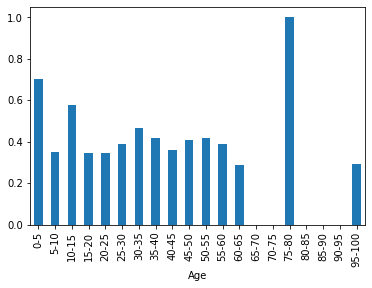

In [41]:
# Binning ages every 10 years
age_bins_list = [-1] + list(range(5, 101, 5))
age_bins_label = [ "{0}-{1}".format(age, age + 5) for age in list(range(0, 100, 5)) ]
age_bins = pd.cut(age_filled_data['Age'],  bins=age_bins_list, labels=age_bins_label)

# Group by age and calculate average
age_grouped_data = age_filled_data.groupby(age_bins).mean()
age_grouped_data['Survived'].plot(kind='bar')

In [43]:
#left = age_grouped_data.index
#height = age_grouped_data['Survived']
#plt.xlabel('Age')
#plt.ylabel('Survival rate')
#plt.bar(left, height)

## SibSp (Number of siblings / spouses aboard the Titanic)

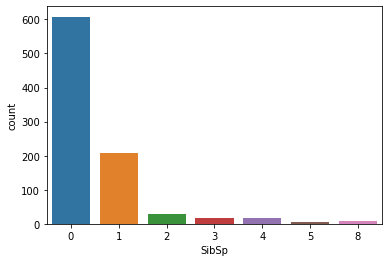

In [19]:
sns.countplot(train_data['SibSp'])

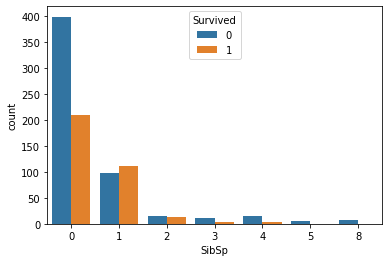

In [20]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')

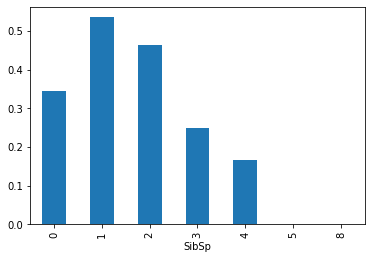

In [21]:
sibsp_mean = train_data.groupby('SibSp').mean()
sibsp_mean['Survived'].plot(kind='bar')

## Parch (Number of parents / children aboard the Titanic)

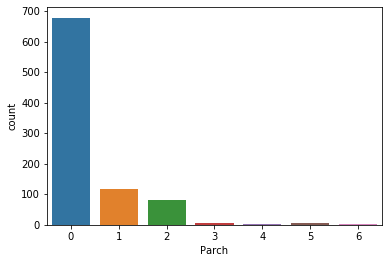

In [22]:
sns.countplot(train_data['Parch'])

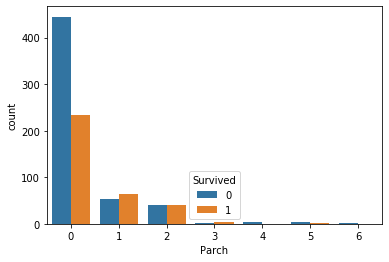

In [23]:
sns.countplot(x='Parch', data=train_data, hue='Survived')

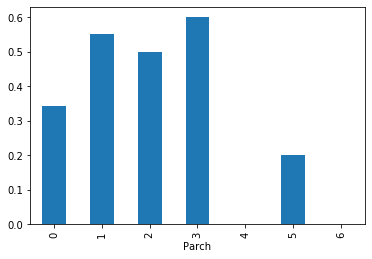

In [24]:
parch_mean = train_data.groupby('Parch').mean()
parch_mean['Survived'].plot(kind='bar')

## Passenger fare

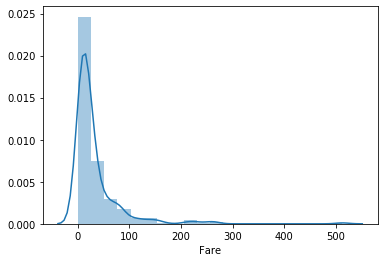

In [124]:
sns.distplot(train_data['Fare'], bins=20)

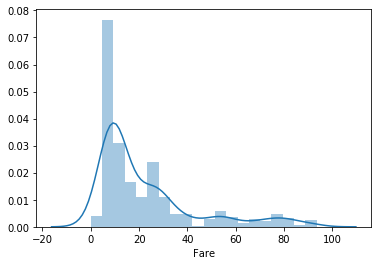

In [125]:
low_fare_data = train_data[train_data["Fare"] < 100]
sns.distplot(low_fare_data['Fare'], bins=20)

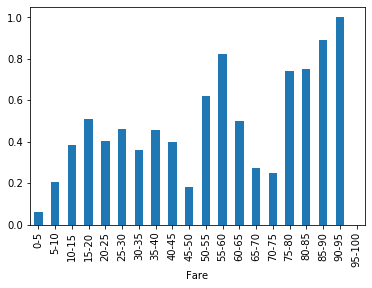

In [123]:
# Binning fare every 5
fare_bins_list =  [-1] + list(range(5, 101, 5))
fare_bins_label_list =  list(range(0, 100, 5))
fare_bins_label = [ "{0}-{1}".format(fare, fare + 5) for fare in (fare_bins_label_list) ]
fare_bins = pd.cut(train_data['Fare'],  bins=fare_bins_list, labels=fare_bins_label)

# Group by Fare and calculate average
fare_grouped_data = train_data.groupby(fare_bins).mean()
fare_grouped_data['Survived'].plot(kind='bar')

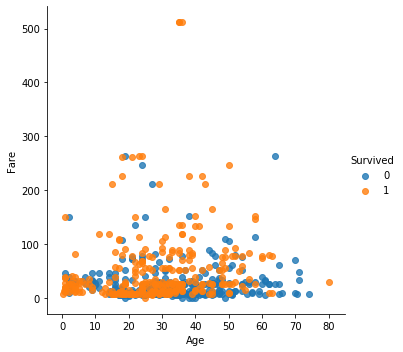

In [49]:
sns.lmplot(data=train_data, x="Age", y="Fare", hue="Survived", fit_reg=False)

## Embarked

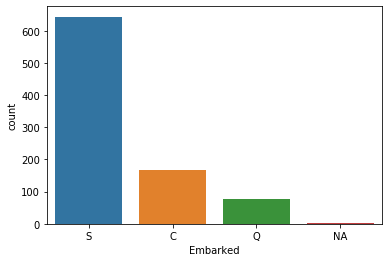

In [53]:
embarked_fillna_data = train_data.fillna({'Embarked': 'NA'})
sns.countplot(embarked_fillna_data['Embarked'])

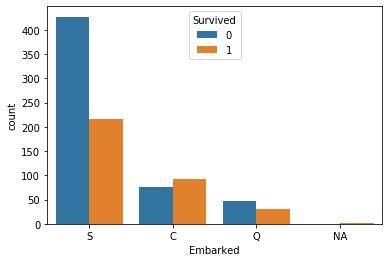

In [54]:
sns.countplot(x='Embarked', data=embarked_fillna_data, hue='Survived')

# Analyze relationship between parameters

## Pclass ans Sex

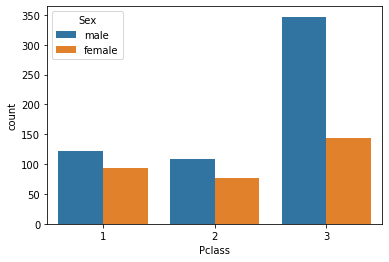

In [55]:
sns.countplot(x='Pclass', data=train_data, hue='Sex')

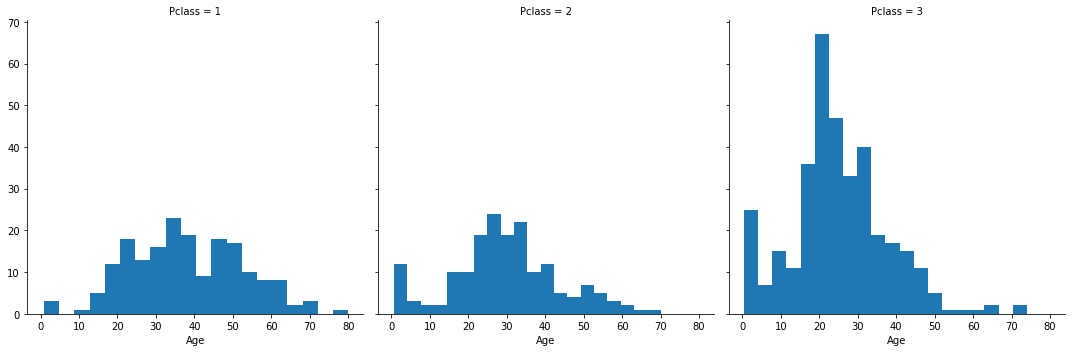

In [99]:
grid = sns.FacetGrid(train_data, col='Pclass', size=5)
grid.map(plt.hist, 'Age',  bins=20)
grid.add_legend()

## Pclass ans Age

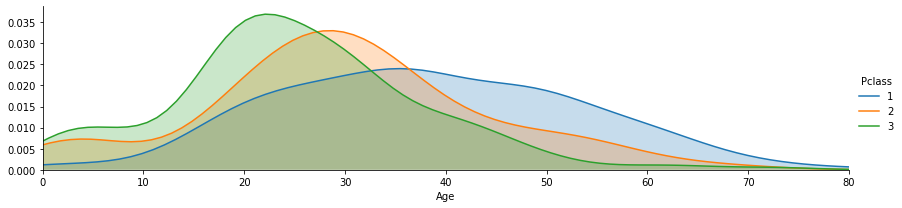

In [30]:
grid = sns.FacetGrid(train_data, hue="Pclass",aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

## Pclass ans SibSp

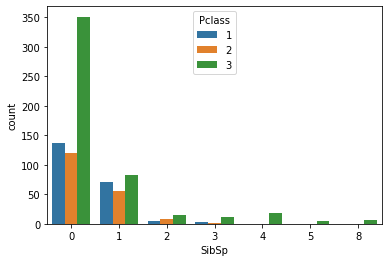

In [100]:
sns.countplot(x='SibSp', data=train_data, hue='Pclass')

## Pclass ans Parch

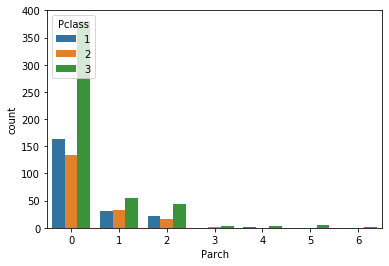

In [108]:
sns.countplot(x='Parch', data=train_data, hue='Pclass')

## Pclass and Fare

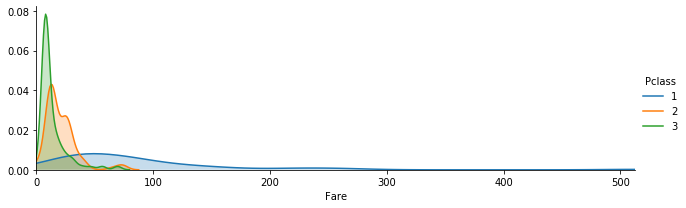

In [113]:
grid = sns.FacetGrid(train_data, hue="Pclass", height=3, aspect=3)
grid.map(sns.kdeplot,'Fare',shade= True)
max_fare = train_data['Fare'].max()
grid.set(xlim=(0, max_fare))
grid.add_legend()

## Sex and Age

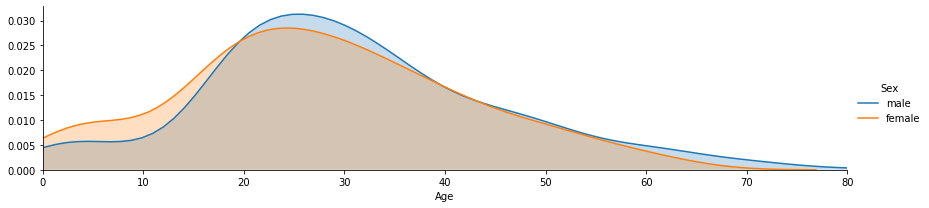

In [71]:
grid = sns.FacetGrid(train_data, hue="Sex",aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

## SibSp and Parch

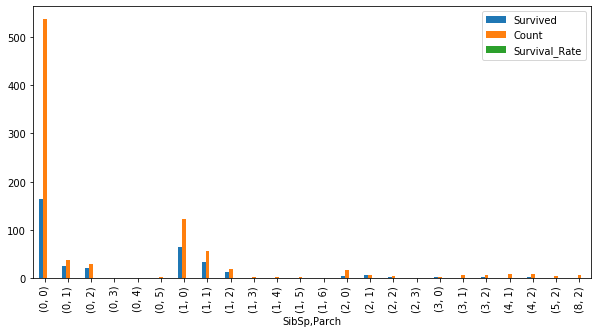

In [159]:
sibsp_parch_group = train_data.groupby(['SibSp', 'Parch'])
survived = sibsp_parch_group['Survived'].sum()
count = sibsp_parch_group['Survived'].count()

sibsp_parch_count = pd.DataFrame(index=survived.index)
sibsp_parch_count['Survived'] = survived
sibsp_parch_count['Count'] = count
sibsp_parch_data.plot.bar(figsize=(10, 5))

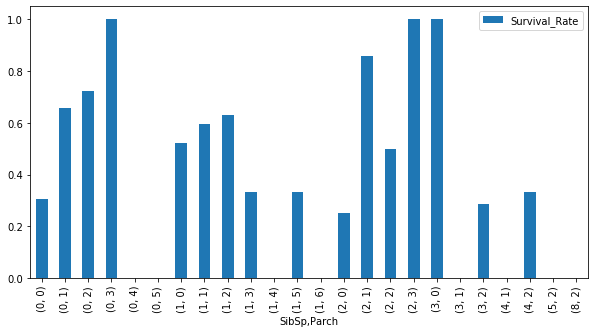

In [160]:
sibsp_parch_rate = pd.DataFrame(index=survived.index)
sibsp_parch_rate['Survival_Rate'] = survived / count
sibsp_parch_rate.plot.bar(figsize=(10, 5))

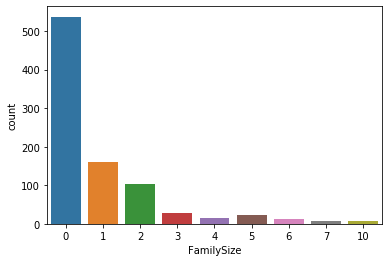

In [157]:
family_size_data = pd.DataFrame(index=train_data.index)
family_size_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
family_size_data['Survived'] = train_data['Survived']

sns.countplot(family_size_data['FamilySize'])

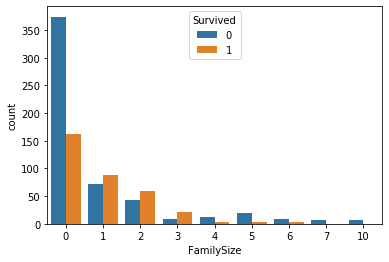

In [158]:
sns.countplot(x='FamilySize', data=family_size_data, hue='Survived')